# 2. Data Cleaning and Exploratory Data Analysis

In this stage we will look at the data and understand the data quality and quantity.\
This stage will give us an indication of the necessary changes that our data needs before processing to different stages.

Points that I will be covering in this notebook:
* Data Collection
* Data Inspection and Cleaning
* Exploratory Data Analysis

This stages requires the data present in the directory: **"data\raw_data"**. \
You will need to download the data using the module in the feature pipeline: **"energy_consumption_forecasting\feature_pipeline\etl_data_extraction.py"** \
or you can run the data extraction notebook: **"notebooks\01_data_extraction.ipynb"**.

Once data is download you can follow along.

## Data Collection

In [1]:
import os
import json
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
sns.set_style('darkgrid')

### Importing the CSV Data as a Pandas DataFrame

In [2]:
# Changing the working directory to project directory
NOTEBOOK_DIR_PATH = Path('D:/projects/energy-consumption-forecasting/notebooks')

if Path(os.getcwd()) == NOTEBOOK_DIR_PATH:
    os.chdir(path='..')

os.getcwd()

'd:\\projects\\energy-consumption-forecasting'

In [3]:
# Getting the raw data directory and all the files in it
RAW_DATA_DIR = Path('data/raw_data/')

file_list = list(RAW_DATA_DIR.iterdir())
file_list

[WindowsPath('data/raw_data/ConsumptionIndustry_2021-01-01T00-00_2024-01-01T00-00.csv'),
 WindowsPath('data/raw_data/ConsumptionIndustry_metadata.json')]

In [4]:
dataset_filepath = file_list[-2]
metadata_filepath = file_list[-1]

# Reading the csv file as a DataFrame and metadata as a json/dict type
dataset_df = pd.read_csv(dataset_filepath)

with open(metadata_filepath) as f:
    metadata = json.load(f)

In [5]:
dataset_df.head(n=10)

,HourUTC,HourDK,MunicipalityNo,Branche,ConsumptionkWh
0,2020-12-31T23:00:00,2021-01-01T00:00:00,860,Privat,19864.474
1,2020-12-31T23:00:00,2021-01-01T00:00:00,860,Offentligt,2237.222
2,2020-12-31T23:00:00,2021-01-01T00:00:00,860,Erhverv,23567.818
3,2020-12-31T23:00:00,2021-01-01T00:00:00,851,Privat,37842.849
4,2020-12-31T23:00:00,2021-01-01T00:00:00,851,Offentligt,10517.319
5,2020-12-31T23:00:00,2021-01-01T00:00:00,851,Erhverv,76259.514
6,2020-12-31T23:00:00,2021-01-01T00:00:00,849,Privat,15856.590
7,2020-12-31T23:00:00,2021-01-01T00:00:00,849,Offentligt,1059.806
8,2020-12-31T23:00:00,2021-01-01T00:00:00,849,Erhverv,9303.045
9,2020-12-31T23:00:00,2021-01-01T00:00:00,846,Privat,11316.856


In [6]:
dataset_df.tail(n=10)

,HourUTC,HourDK,MunicipalityNo,Branche,ConsumptionkWh
7705142,2023-12-31T22:00:00,2023-12-31T23:00:00,153,Erhverv,10159.844
7705143,2023-12-31T22:00:00,2023-12-31T23:00:00,151,Privat,8356.559
7705144,2023-12-31T22:00:00,2023-12-31T23:00:00,151,Offentligt,2178.080
7705145,2023-12-31T22:00:00,2023-12-31T23:00:00,151,Erhverv,26168.271
7705146,2023-12-31T22:00:00,2023-12-31T23:00:00,147,Privat,10368.619
7705147,2023-12-31T22:00:00,2023-12-31T23:00:00,147,Offentligt,3721.546
7705148,2023-12-31T22:00:00,2023-12-31T23:00:00,147,Erhverv,10112.175
7705149,2023-12-31T22:00:00,2023-12-31T23:00:00,101,Privat,56877.877
7705150,2023-12-31T22:00:00,2023-12-31T23:00:00,101,Offentligt,28333.311
7705151,2023-12-31T22:00:00,2023-12-31T23:00:00,101,Erhverv,144994.720


In [7]:
metadata

{'datasetId': 18,
 'datasetName': 'ConsumptionIndustry',
 'title': 'Consumption per Industry, Public and Private, Municipality and Hour',
 'description': 'Hourly consumption of industries, public sector and private units by municipality code.',
 'organizationName': 'tso-electricity',
 'updateFrequency': 'P1D',
 'comment': "* Categories are created based on Statistics Denmark's DK10 Industry Codes:\n* \\- The category 9 ('Offentlig, undervisning og sundhed') is labeled 'Offentligt' (public).\n* \\- Units connected to a CVR number in the other of Statistics Denmark's categories, including category 11 ('Uoplyst aktivitet') are labeled 'Erhverv' (industry).\n* \\- Other units (without CVR numbers) are labeled as 'Privat' (private).\n\nUpdated gradually since 2021.  ",
 'filterColumn': 'HourUTC',
 'author': 'Energinet',
 'resolution': '1 hour (PT1H)',
 'columns': [{'dbColumn': 'HourUTC',
   'dataType': 'datetime',
   'sortOrder': 1,
   'primaryKeyIndex': 1,
   'displayName': 'Hour UTC',
   

Shape of the dataset

In [8]:
print(f'Dataset shape: {dataset_df.shape}\nDataset features: {list(dataset_df.columns)}')

Dataset shape: (7705152, 5)
Dataset features: ['HourUTC', 'HourDK', 'MunicipalityNo', 'Branche', 'ConsumptionkWh']


### Dataset Information:

There are 5 features and 1296246 data in total for a period of 6 months.
* **HourUTC:** A datetime column in UTC format. Format is in "%Y-%m-%dT%H:%M:%S"
* **HourDK:** A datetime column in Danish Timezone format. Format is in "%Y-%m-%dT%H:%M:%S"
* **MunicipalityNo:** A total of 98 municipality number are present ranging in between of 101 and 860.
* **Branche:** All the categories are grouped in three branch: 1. Erhverv, 2. Offentligt and 3. Privat.
* **ConsumptionkWh:** Electricity consumption in kilowatt-hour.

## Data Inspection and Cleaning

### Missing Value

In [9]:
dataset_df.isna().sum()

HourUTC           0
HourDK            0
MunicipalityNo    0
Branche           0
ConsumptionkWh    0
dtype: int64

### Data Types

In [10]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7705152 entries, 0 to 7705151
Data columns (total 5 columns):
 #   Column          Dtype  
---  ------          -----  
 0   HourUTC         object 
 1   HourDK          object 
 2   MunicipalityNo  int64  
 3   Branche         object 
 4   ConsumptionkWh  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 293.9+ MB


Fixing the data types before moving forward

In [11]:
dataset_df['HourUTC'] = pd.to_datetime(dataset_df['HourUTC'], format='%Y-%m-%dT%H:%M:%S')
dataset_df['HourDK'] = pd.to_datetime(dataset_df['HourDK'], format='%Y-%m-%dT%H:%M:%S')
dataset_df['Branche'] = dataset_df['Branche'].astype('category')
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7705152 entries, 0 to 7705151
Data columns (total 5 columns):
 #   Column          Dtype         
---  ------          -----         
 0   HourUTC         datetime64[ns]
 1   HourDK          datetime64[ns]
 2   MunicipalityNo  int64         
 3   Branche         category      
 4   ConsumptionkWh  float64       
dtypes: category(1), datetime64[ns](2), float64(1), int64(1)
memory usage: 242.5 MB


### Statistic

In [12]:
dataset_df.describe().apply(lambda x: f'{x:.2f}' if type(x) == float else x)

,HourUTC,HourDK,MunicipalityNo,ConsumptionkWh
count,7705152,7705152,7.705152e+06,7.705152e+06
mean,2022-07-01 04:14:20.439559424,2022-07-01 05:49:56.703296256,4.621735e+02,1.297760e+04
min,2020-12-31 23:00:00,2021-01-01 00:00:00,1.010000e+02,1.023000e+00
25%,2021-09-30 22:45:00,2021-10-01 00:45:00,2.400000e+02,2.126959e+03
50%,2022-06-30 22:30:00,2022-07-01 00:30:00,4.350000e+02,7.050444e+03
75%,2023-03-30 22:15:00,2023-03-31 00:15:00,7.060000e+02,1.535861e+04
max,2023-12-31 22:00:00,2023-12-31 23:00:00,8.600000e+02,4.317939e+05
std,NaN,NaN,2.353454e+02,2.047185e+04


In [13]:
dataset_df.describe(include='category')

,Branche
count,7705152
unique,3
top,Erhverv
freq,2575440


In [14]:
dataset_df.Branche.unique()

['Privat', 'Offentligt', 'Erhverv']
Categories (3, object): ['Erhverv', 'Offentligt', 'Privat']

In [15]:
dataset_df.Branche.value_counts()

Branche
Erhverv       2575440
Privat        2575440
Offentligt    2554272
Name: count, dtype: int64

In [16]:
print(f'Municipality Numbers:\n{dataset_df.MunicipalityNo.unique()}\n')
print(f'Total unique numbers are: {len(dataset_df.MunicipalityNo.unique())}')

Municipality Numbers:
[860 851 849 846 840 825 820 813 810 791 787 779 773 766 760 756 751 746
 741 740 730 727 710 707 706 671 665 661 657 630 621 615 607 580 575 573
 563 561 550 540 530 510 492 482 480 479 461 450 440 430 420 410 400 390
 376 370 360 350 340 336 330 329 326 320 316 306 270 269 265 260 259 253
 250 240 230 223 219 217 210 201 190 187 185 183 175 173 169 167 165 163
 161 159 157 155 153 151 147 101]

Total unique numbers are: 98


In [17]:
dataset_df['MunicipalityNo'].value_counts()

MunicipalityNo
860    78624
240    78624
253    78624
259    78624
260    78624
265    78624
269    78624
270    78624
306    78624
316    78624
320    78624
326    78624
329    78624
330    78624
336    78624
340    78624
350    78624
360    78624
370    78624
376    78624
390    78624
400    78624
410    78624
250    78624
230    78624
851    78624
223    78624
147    78624
151    78624
153    78624
155    78624
157    78624
159    78624
161    78624
163    78624
165    78624
167    78624
169    78624
173    78624
175    78624
183    78624
185    78624
187    78624
190    78624
201    78624
210    78624
217    78624
219    78624
420    78624
430    78624
440    78624
450    78624
710    78624
727    78624
730    78624
740    78624
741    78624
746    78624
751    78624
756    78624
760    78624
766    78624
773    78624
779    78624
787    78624
791    78624
810    78624
813    78624
820    78624
825    78624
840    78624
846    78624
849    78624
707    78624
706    78624
671    786

The statistic does not help much in Municipality Number because it is like an id representation for different geography sectors, which makes it a nominal categorical data. \
The HourUTC and HourDK show the period of the dataset which is between 1st July 2023 and 31st Dec 2023. \
The Branche feature has 3 unique data, which is mentioned in the metadata. All three categories have almost equal amount of data. \
Finally, the target feature ConsumptionkWh has a median 6826 while the max value is 431794, which indicates positive skewness and outliers.

### Transforming the Dataset (Feature Engineering)

In [18]:
# Dropping UTC datetime column because we have denmark datetime column
dataset_df.drop(columns=['HourUTC'], inplace=True)

In [19]:
# Renaming the columns
new_columns = {'HourDK': 'datetime_dk', 
               'MunicipalityNo': 'municipality_num', 
               'Branche': 'branch', 
               'ConsumptionkWh': 'consumption_kwh'}

dataset_df.rename(columns=new_columns, inplace=True)
dataset_df.columns

Index(['datetime_dk', 'municipality_num', 'branch', 'consumption_kwh'], dtype='object')

In [20]:
# Sorting the dataset
dataset_df.sort_values(by=['branch', 'municipality_num', 'datetime_dk'], inplace=True)

In [21]:
# Translating the branch categories from Danish to English
new_branch_categories = {'Offentligt': 'public',
                         'Erhverv': 'industry',
                         'Privat': 'private'}

dataset_df['branch'] = dataset_df['branch'].cat.rename_categories(new_branch_categories)
dataset_df.head()

,datetime_dk,municipality_num,branch,consumption_kwh
293,2021-01-01 00:00:00,101,industry,135639.677
587,2021-01-01 01:00:00,101,industry,134312.261
881,2021-01-01 02:00:00,101,industry,131755.793
1175,2021-01-01 03:00:00,101,industry,129231.294
1469,2021-01-01 04:00:00,101,industry,130280.386


In [22]:
dataset_df['branch'].unique()

['industry', 'public', 'private']
Categories (3, object): ['industry', 'public', 'private']

In [23]:
# Now that we have renamed the categories, we will create another dataset that have all the features in numerical format
feature_df = dataset_df.copy()

branch_mapping = {'public': 1,
                  'industry': 2,
                  'private': 3}

feature_df['branch'] = feature_df['branch'].apply(lambda x: branch_mapping.get(x)).astype('int8')
feature_df = feature_df.sort_values(by=['municipality_num', 'branch', 'datetime_dk']).reset_index(drop=True)
feature_df.head()

,datetime_dk,municipality_num,branch,consumption_kwh
0,2021-01-01 00:00:00,101,1,27598.615
1,2021-01-01 01:00:00,101,1,27333.589
2,2021-01-01 02:00:00,101,1,27193.939
3,2021-01-01 03:00:00,101,1,27163.743
4,2021-01-01 04:00:00,101,1,27371.502


#### Dropping Duplicates 

In [24]:
feature_df = feature_df.drop_duplicates(subset=['datetime_dk', 'municipality_num', 'branch'], ignore_index=True)

In [25]:
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7704270 entries, 0 to 7704269
Data columns (total 4 columns):
 #   Column            Dtype         
---  ------            -----         
 0   datetime_dk       datetime64[ns]
 1   municipality_num  int64         
 2   branch            int8          
 3   consumption_kwh   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), int8(1)
memory usage: 183.7 MB


In [26]:
# Creating a new column, converting the consumption feature from kilowatt-hour to megawatt-hour
feature_df['consumption_mwh'] = feature_df['consumption_kwh'] / 1000
feature_df.head()

,datetime_dk,municipality_num,branch,consumption_kwh,consumption_mwh
0,2021-01-01 00:00:00,101,1,27598.615,27.598615
1,2021-01-01 01:00:00,101,1,27333.589,27.333589
2,2021-01-01 02:00:00,101,1,27193.939,27.193939
3,2021-01-01 03:00:00,101,1,27163.743,27.163743
4,2021-01-01 04:00:00,101,1,27371.502,27.371502


In [27]:
# Creating new columns based on the data present in the feature datetime_dk
feature_df['hour_dk'] = feature_df.datetime_dk.dt.hour
feature_df['dayofmonth_dk'] = feature_df.datetime_dk.dt.day
feature_df['month_dk'] = feature_df.datetime_dk.dt.month
feature_df['year_dk'] = feature_df.datetime_dk.dt.year
feature_df['dayofweek_dk'] = feature_df.datetime_dk.dt.dayofweek
feature_df['dayofyear_dk'] = feature_df.datetime_dk.dt.dayofyear
feature_df['weekofyear'] = feature_df.datetime_dk.dt.isocalendar().week
feature_df['quarter_dk'] = feature_df.datetime_dk.dt.quarter

In [28]:
feature_df.head()

,datetime_dk,municipality_num,branch,consumption_kwh,consumption_mwh,hour_dk,dayofmonth_dk,month_dk,year_dk,dayofweek_dk,dayofyear_dk,weekofyear,quarter_dk
0,2021-01-01 00:00:00,101,1,27598.615,27.598615,0,1,1,2021,4,1,53,1
1,2021-01-01 01:00:00,101,1,27333.589,27.333589,1,1,1,2021,4,1,53,1
2,2021-01-01 02:00:00,101,1,27193.939,27.193939,2,1,1,2021,4,1,53,1
3,2021-01-01 03:00:00,101,1,27163.743,27.163743,3,1,1,2021,4,1,53,1
4,2021-01-01 04:00:00,101,1,27371.502,27.371502,4,1,1,2021,4,1,53,1


In [29]:
feature_df.tail()

,datetime_dk,municipality_num,branch,consumption_kwh,consumption_mwh,hour_dk,dayofmonth_dk,month_dk,year_dk,dayofweek_dk,dayofyear_dk,weekofyear,quarter_dk
7704265,2023-12-31 19:00:00,860,3,27118.784,27.118784,19,31,12,2023,6,365,52,4
7704266,2023-12-31 20:00:00,860,3,23715.430,23.715430,20,31,12,2023,6,365,52,4
7704267,2023-12-31 21:00:00,860,3,21958.973,21.958973,21,31,12,2023,6,365,52,4
7704268,2023-12-31 22:00:00,860,3,20627.702,20.627702,22,31,12,2023,6,365,52,4
7704269,2023-12-31 23:00:00,860,3,19564.207,19.564207,23,31,12,2023,6,365,52,4


## Exploratory Data Analysis

In [30]:
# First looking at the corelation matrix
corr_map_df = feature_df.corr().fillna(0)
corr_map_df

,datetime_dk,municipality_num,branch,consumption_kwh,consumption_mwh,hour_dk,dayofmonth_dk,month_dk,year_dk,dayofweek_dk,dayofyear_dk,weekofyear,quarter_dk
datetime_dk,1.000000e+00,-2.055710e-12,4.910554e-03,-0.003874,-0.003874,8.661343e-04,3.577217e-02,3.296672e-01,9.425950e-01,5.322172e-04,3.310978e-01,3.199296e-01,3.194467e-01
municipality_num,-2.055710e-12,1.000000e+00,-3.173385e-14,0.107880,0.107880,4.082423e-14,1.010229e-13,4.631273e-14,-4.840471e-13,-1.157402e-15,2.148197e-13,-3.614565e-14,4.097177e-14
branch,4.910554e-03,-3.173385e-14,1.000000e+00,0.152530,0.152530,-5.290958e-07,-3.222815e-03,3.292862e-03,4.138407e-03,9.293181e-04,3.011193e-03,2.961114e-03,4.173615e-03
consumption_kwh,-3.873591e-03,1.078797e-01,1.525299e-01,1.000000,1.000000,3.824824e-02,-4.962878e-03,-6.529527e-03,-1.784409e-03,-2.781767e-02,-6.662227e-03,-6.740963e-03,-8.030172e-03
consumption_mwh,-3.873591e-03,1.078797e-01,1.525299e-01,1.000000,1.000000,3.824824e-02,-4.962878e-03,-6.529527e-03,-1.784409e-03,-2.781767e-02,-6.662227e-03,-6.740963e-03,-8.030172e-03
hour_dk,8.661343e-04,4.082423e-14,-5.290958e-07,0.038248,0.038248,1.000000e+00,2.013199e-04,-1.602748e-04,5.290958e-07,2.354077e-04,-1.442376e-04,-1.517130e-04,-2.120692e-04
dayofmonth_dk,3.577217e-02,1.010229e-13,-3.222815e-03,-0.004963,-0.004963,2.013199e-04,1.000000e+00,1.488329e-02,3.233461e-03,-2.229285e-03,9.798482e-02,6.736431e-02,1.788174e-02
month_dk,3.296672e-01,4.631273e-14,3.292862e-03,-0.006530,-0.006530,-1.602748e-04,1.488329e-02,1.000000e+00,-3.292862e-03,1.205652e-03,9.965144e-01,9.658196e-01,9.714013e-01
year_dk,9.425950e-01,-4.840471e-13,4.138407e-03,-0.001784,-0.001784,5.290958e-07,3.233461e-03,-3.292862e-03,1.000000e+00,1.931885e-04,-3.010306e-03,-3.184767e-03,-4.173615e-03
dayofweek_dk,5.322172e-04,-1.157402e-15,9.293181e-04,-0.027818,-0.027818,2.354077e-04,-2.229285e-03,1.205652e-03,1.931885e-04,1.000000e+00,1.047227e-03,4.363183e-03,5.625089e-03


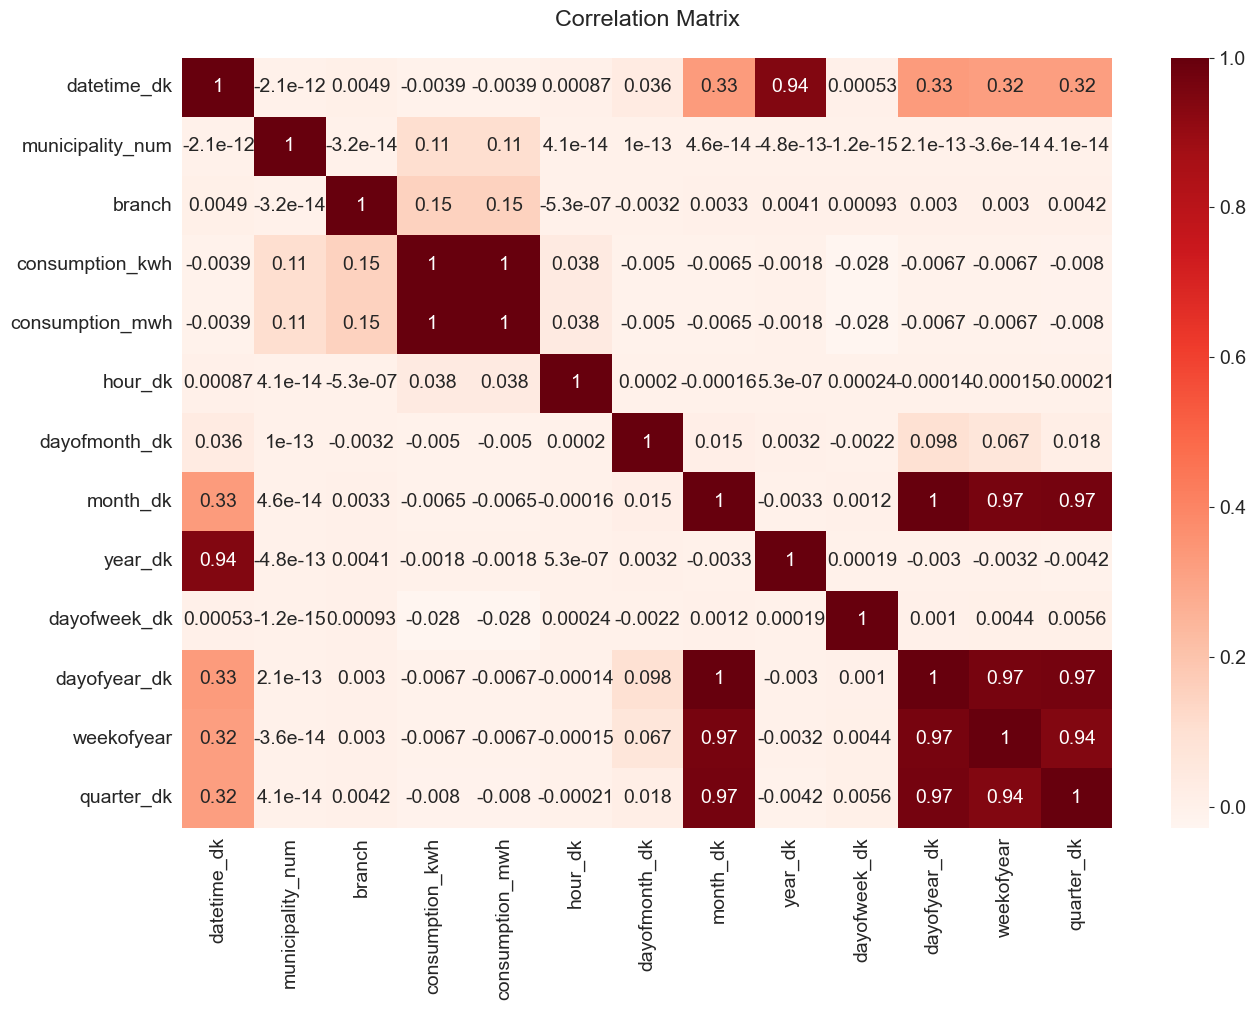

In [31]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr_map_df, cmap='Reds', annot=True, )
plt.title('Correlation Matrix\n');

Municipality_num and branch have a positive correlation with consumption feature but similar to all the features they to have weak correlation. \
Only the hour_dk feature has positive correlation with the consumption feature in all the datetime features, this may be because the datetime feature is in hourly intervals.

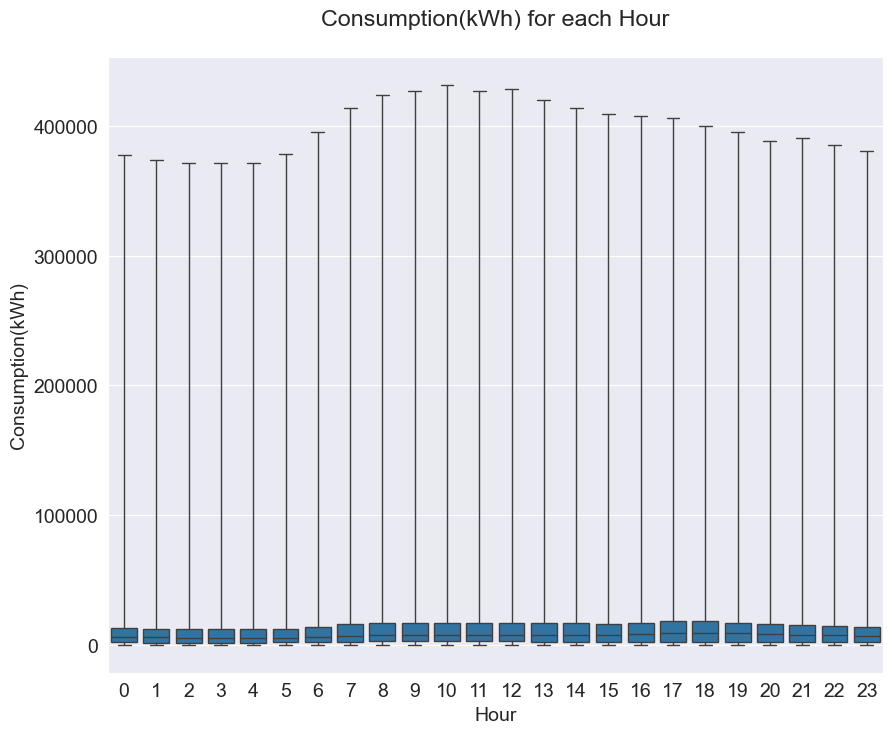

In [32]:
# Checking hourly consumption
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=feature_df, x='hour_dk', y='consumption_kwh', whis=(0, 100))
ax.set_title('Consumption(kWh) for each Hour\n')
ax.set_xlabel('Hour')
ax.set_ylabel('Consumption(kWh)')
plt.show()

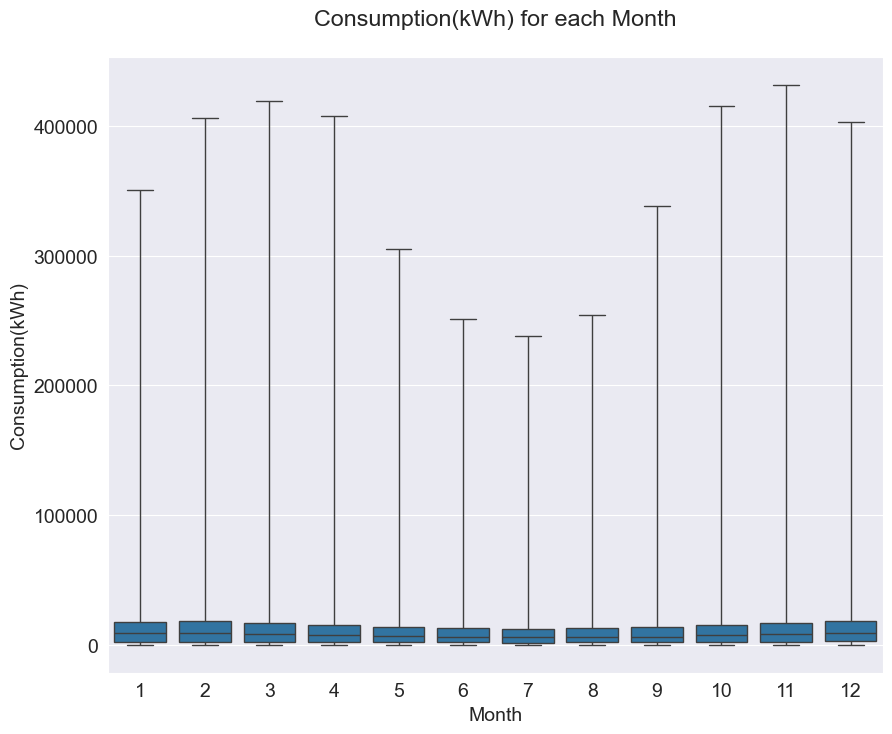

In [33]:
# Checking monthly consumption
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=feature_df, x='month_dk', y='consumption_kwh', whis=(0, 100))
ax.set_title('Consumption(kWh) for each Month\n')
ax.set_xlabel('Month')
ax.set_ylabel('Consumption(kWh)')
plt.show()

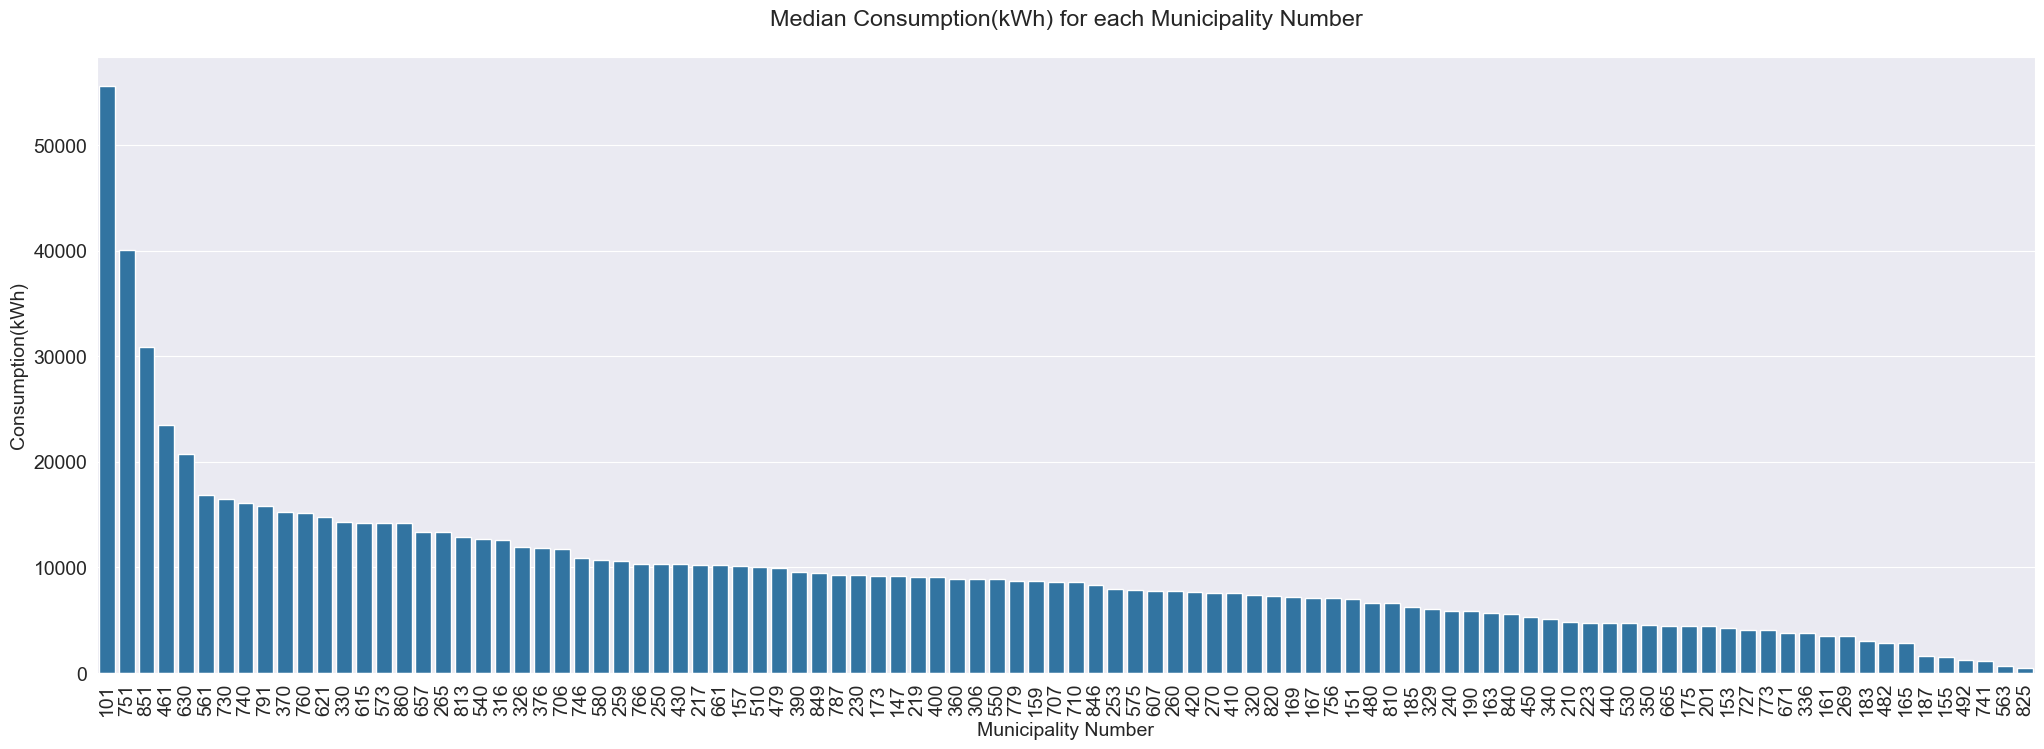

In [34]:
# Plotting using the branch feature
fig, ax = plt.subplots(figsize=(25, 8))
data = feature_df[['municipality_num', 'consumption_kwh']].groupby(by=['municipality_num']).median().sort_values('consumption_kwh', ascending=False)
sns.barplot(data=data,
              x='municipality_num',
              y='consumption_kwh',
              order=data.index)
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(data.index, rotation=90)
ax.set_title('Median Consumption(kWh) for each Municipality Number\n')
ax.set_xlabel('Municipality Number')
ax.set_ylabel('Consumption(kWh)')
plt.show()

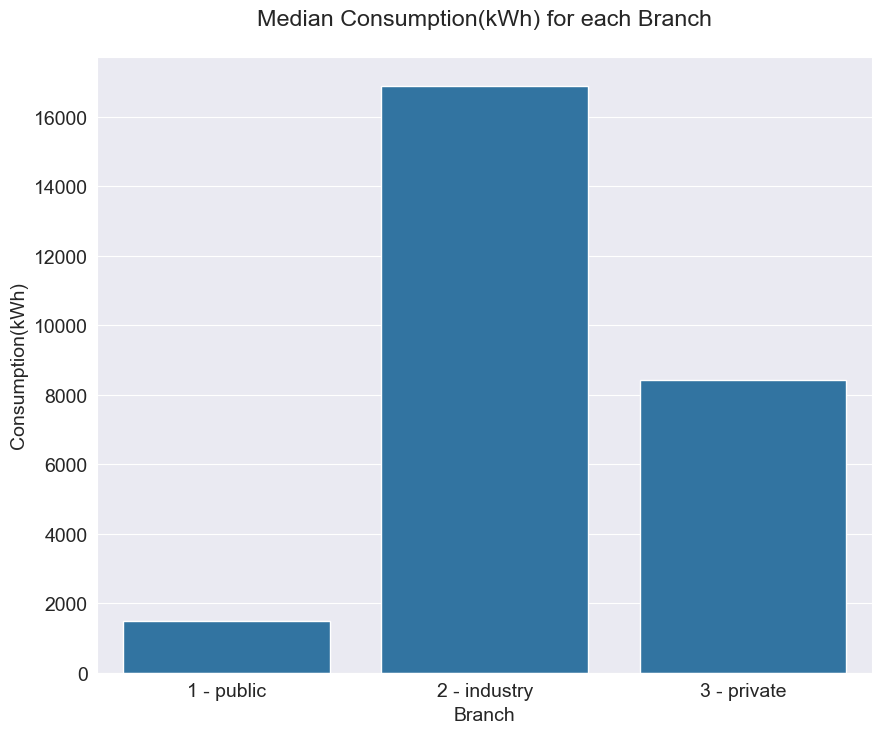

In [35]:
# Plotting using the branch feature
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data=feature_df[['branch', 'consumption_kwh']].groupby(by=['branch']).median(),
              x='branch',
              y='consumption_kwh')
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels([f'{i[1]} - {i[0]}' for i in branch_mapping.items()])
ax.set_title('Median Consumption(kWh) for each Branch\n')
ax.set_xlabel('Branch')
ax.set_ylabel('Consumption(kWh)')
plt.show()

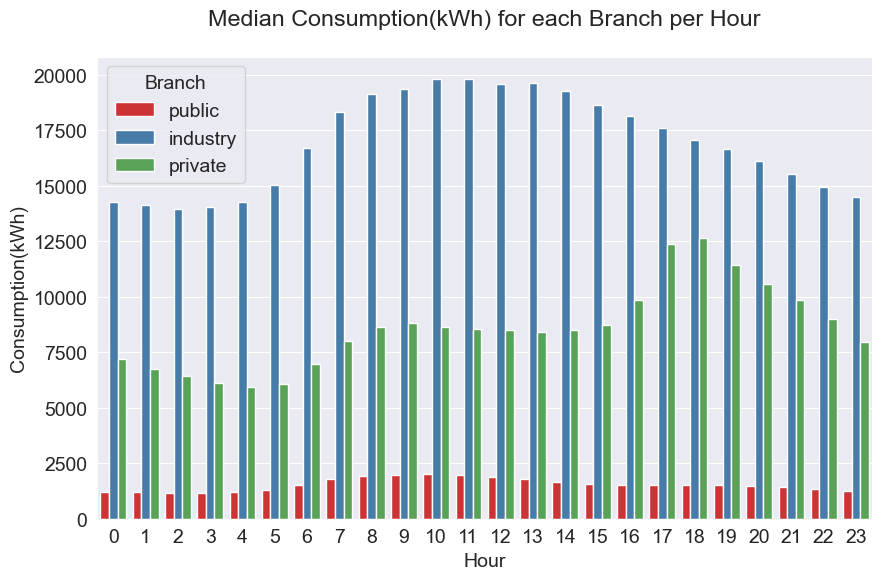

In [36]:
# Plotting using the branch feature
g = sns.barplot(data=feature_df[['branch', 'hour_dk', 'consumption_kwh']].groupby(by=['hour_dk', 'branch']).median(),
                x='hour_dk',
                y='consumption_kwh',
                hue='branch',
                palette='Set1')

legend = g.axes.get_legend()
legend.set_title('Branch')
for t, l in zip(legend.texts, list(branch_mapping.keys())):
    t.set_text(l)

g.set_title('Median Consumption(kWh) for each Branch per Hour\n')
g.set_xlabel('Hour')
g.set_ylabel('Consumption(kWh)')
plt.show()